<a href="https://colab.research.google.com/github/marcoss00/fundamentos_ia_data_science/blob/master/Atividade_2_2_Expected_values%2C_Surprise%2C_Entropy%2C_Cross_entropy_loss%2C_Softmax_e_True_labels_(one_hot_encoded).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A - Surpresa

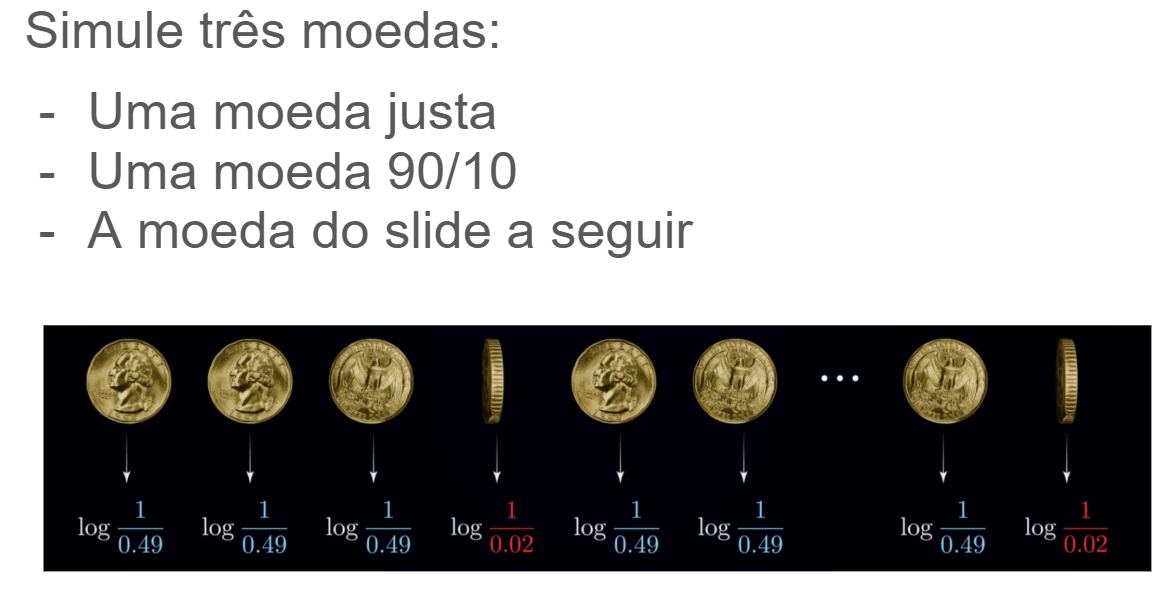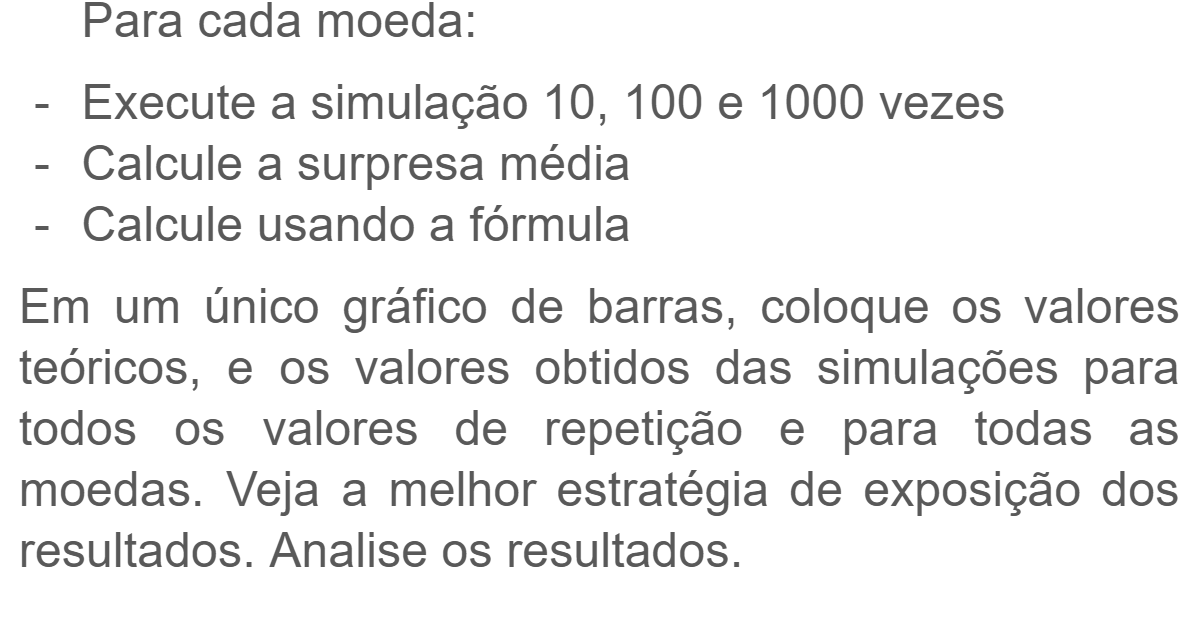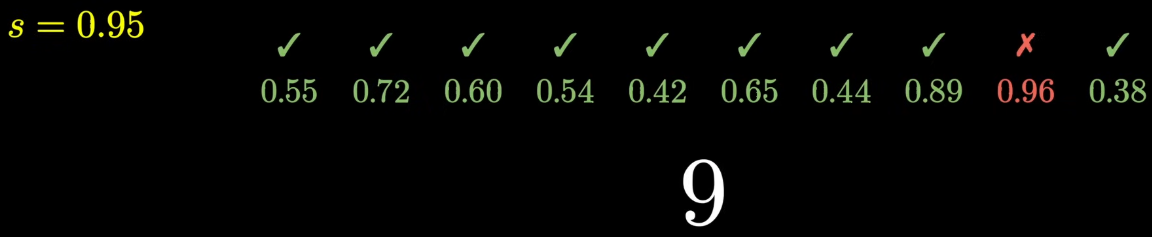

Moeda justa - 10 lançamentos
Caras: 6, Coroas: 4
Probabilidade cara: 0.6000, Probabilidade coroa: 0.4000
Surpresa média (entropia): 0.9710

Moeda justa - 100 lançamentos
Caras: 53, Coroas: 47
Probabilidade cara: 0.5300, Probabilidade coroa: 0.4700
Surpresa média (entropia): 0.9974

Moeda justa - 1000 lançamentos
Caras: 476, Coroas: 524
Probabilidade cara: 0.4760, Probabilidade coroa: 0.5240
Surpresa média (entropia): 0.9983

Moeda 90/10 - 10 lançamentos
Caras: 8, Coroas: 2
Probabilidade cara: 0.8000, Probabilidade coroa: 0.2000
Surpresa média (entropia): 0.7219

Moeda 90/10 - 100 lançamentos
Caras: 86, Coroas: 14
Probabilidade cara: 0.8600, Probabilidade coroa: 0.1400
Surpresa média (entropia): 0.5842

Moeda 90/10 - 1000 lançamentos
Caras: 903, Coroas: 97
Probabilidade cara: 0.9030, Probabilidade coroa: 0.0970
Surpresa média (entropia): 0.4594

Moeda s=0.95 - 10 lançamentos
Caras: 9, Coroas: 1
Probabilidade cara: 0.9000, Probabilidade coroa: 0.1000
Surpresa média (entropia): 0.4690

Mo

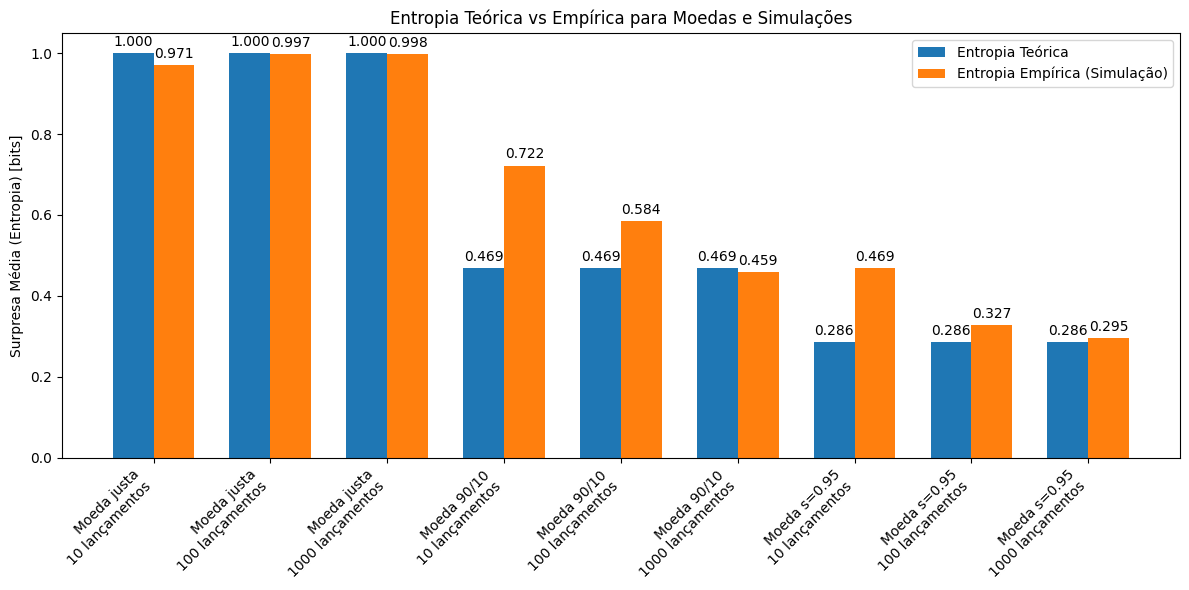

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def moeda_justa():
    return 'cara' if random.random() < 0.5 else 'coroa'

def moeda_tendenciosa_90_10():
    return 'cara' if random.random() < 0.9 else 'coroa'

def moeda_s_095():
    return 'cara' if random.random() < 0.95 else 'coroa'

def surpresa_media(p_cara, p_coroa):
    H = 0
    if p_cara > 0:
        H -= p_cara * math.log2(p_cara)
    if p_coroa > 0:
        H -= p_coroa * math.log2(p_coroa)
    return H

# Probabilidades teóricas para cada moeda
probs_teoricas = {
    'Moeda justa': (0.5, 0.5),
    'Moeda 90/10': (0.9, 0.1),
    'Moeda s=0.95': (0.95, 0.05)
}

# Funções para cada moeda
funcoes_moeda = {
    'Moeda justa': moeda_justa,
    'Moeda 90/10': moeda_tendenciosa_90_10,
    'Moeda s=0.95': moeda_s_095
}

simulacoes = [10, 100, 1000]

# Guardar resultados para plotagem
entropias_teoricas = []
entropias_empiricas = []
labels = []

for moeda in funcoes_moeda.keys():
    # Entropia teórica para cada moeda
    p_teorica_cara, p_teorica_coroa = probs_teoricas[moeda]
    H_teorica = surpresa_media(p_teorica_cara, p_teorica_coroa)

    for sim in simulacoes:
        # Simulação
        resultados = [funcoes_moeda[moeda]() for _ in range(sim)]
        caras = resultados.count('cara')
        coroas = resultados.count('coroa')
        p_emp_cara = caras / sim
        p_emp_coroa = coroas / sim
        H_empirica = surpresa_media(p_emp_cara, p_emp_coroa)

        # Armazena valores
        entropias_teoricas.append(H_teorica)
        entropias_empiricas.append(H_empirica)
        labels.append(f'{moeda}\n{sim} lançamentos')

        print(f"{moeda} - {sim} lançamentos")
        print(f'Caras: {caras}, Coroas: {coroas}')
        print(f'Probabilidade cara: {p_emp_cara:.4f}, Probabilidade coroa: {p_emp_coroa:.4f}')
        print(f'Surpresa média (entropia): {H_empirica:.4f}')
        print()

# Plotagem

x = np.arange(len(labels))  # posição no eixo x
width = 0.35  # largura das barras

fig, ax = plt.subplots(figsize=(12, 6))
bars_teoricas = ax.bar(x - width/2, entropias_teoricas, width, label='Entropia Teórica')
bars_empiricas = ax.bar(x + width/2, entropias_empiricas, width, label='Entropia Empírica (Simulação)')

# Labels e título
ax.set_ylabel('Surpresa Média (Entropia) [bits]')
ax.set_title('Entropia Teórica vs Empírica para Moedas e Simulações')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Mostrar valores em cima das barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_teoricas)
autolabel(bars_empiricas)

plt.tight_layout()
plt.show()


🪙 Moeda justa (0.5, 0.5)
✅ Entropia máxima → maior incerteza possível: totalmente imprevisível.


🪙 Moeda 0.9 (0.9, 0.1)
🔻 Menor entropia do que a moeda justa → mais previsível.

🪙 Moeda 0.95 (0.95, 0.05)
🔻🔻 Ainda menor entropia → ainda mais previsível que a moeda 0.9.

* A surpresa média é a média ponderada da surpresa de todos os possíveis eventos, ou seja, a entropia da distribuição.
* Com mais lançamentos, a probabilidade empírica tende a se aproximar da probabilidade teórica de cada moeda.
* Serve para medir a incerteza de uma distribuição:
  * Se todos os eventos são igualmente prováveis (distribuição uniforme), a entropia é máxima.
  * Se um evento é certo (probabilidade 1), a entropia é zero (nenhuma surpresa).

* Quanto mais desequilibrada a moeda, menor a entropia.

* Entropia mede incerteza: Moeda justa tem a maior incerteza, pois ambos os resultados são igualmente prováveis.

* Moedas viciadas carregam menos "informação nova" por lançamento, pois seus resultados são mais previsíveis.

# B - Entropia

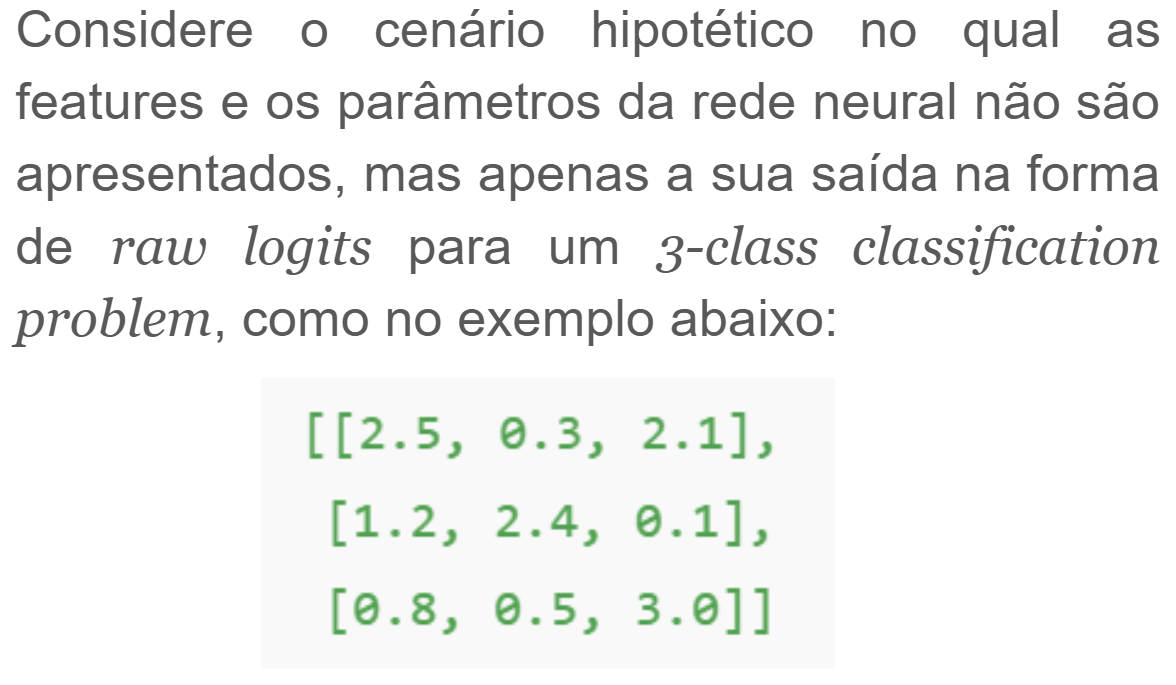

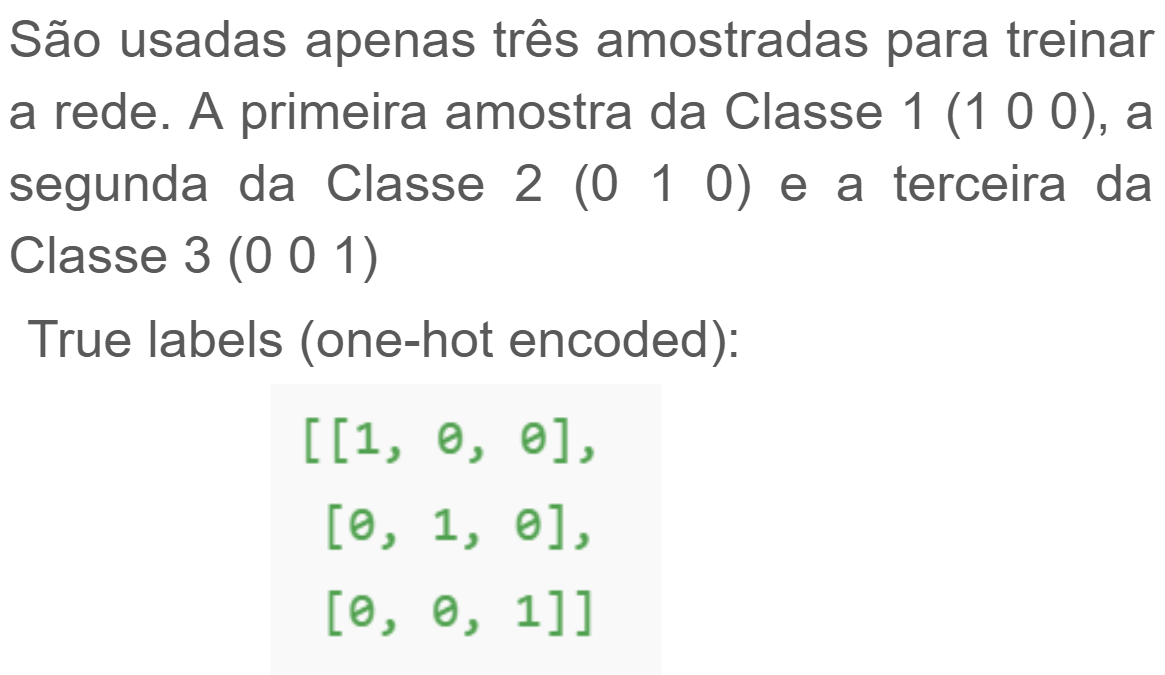

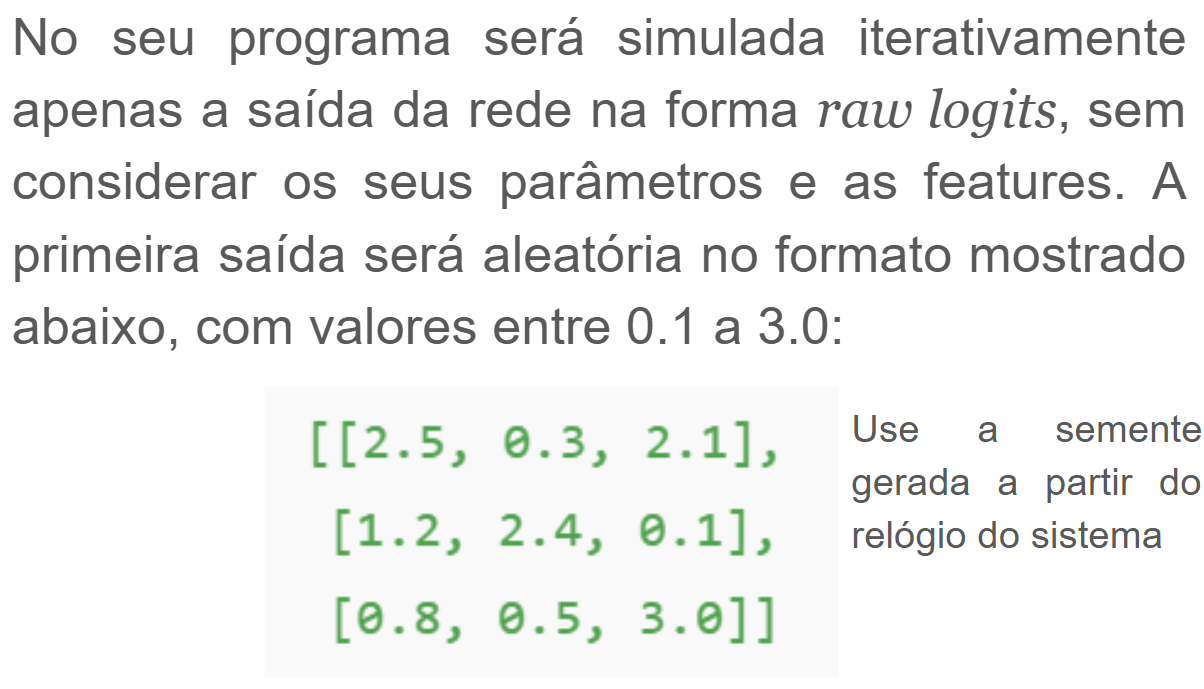

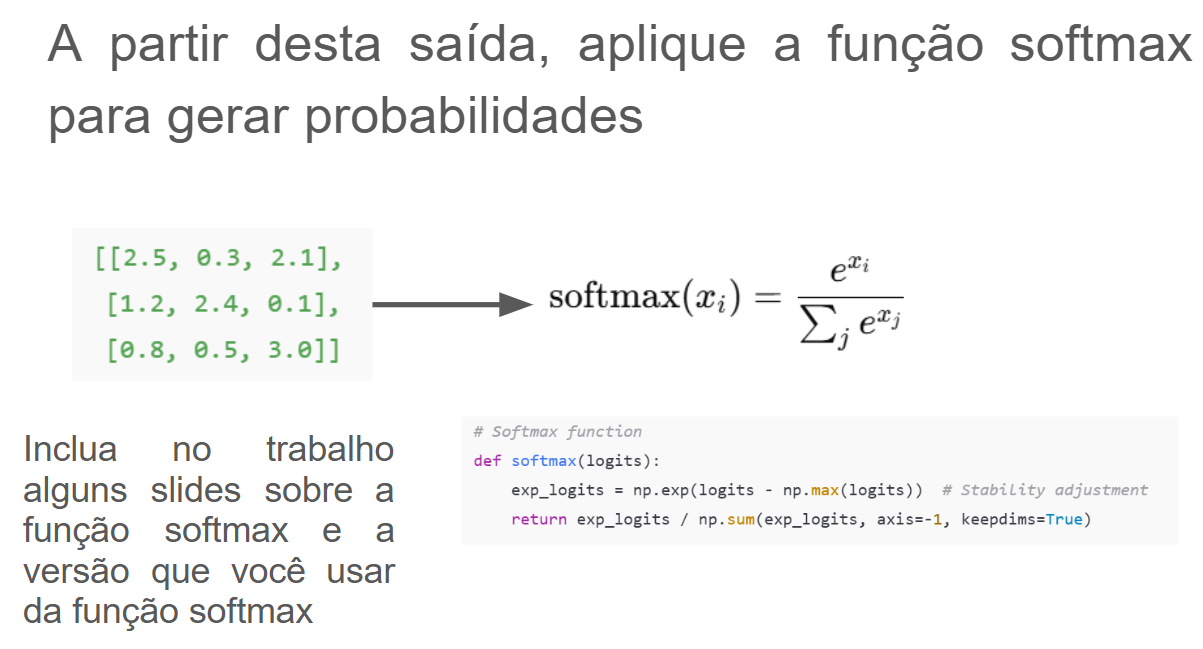

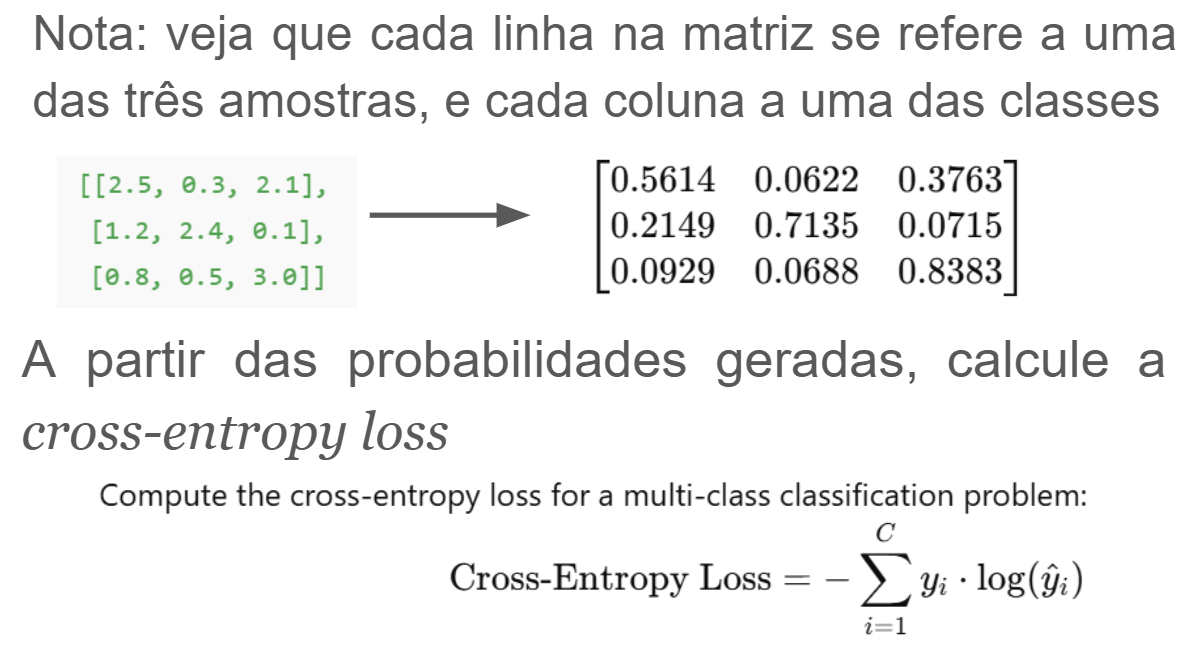

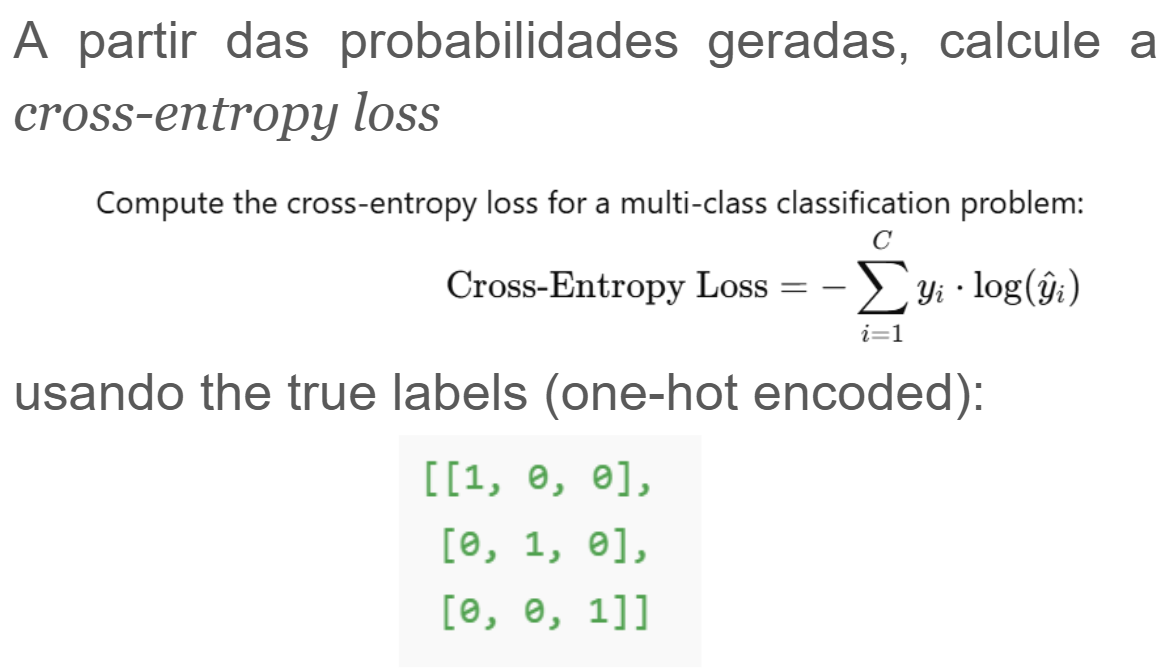

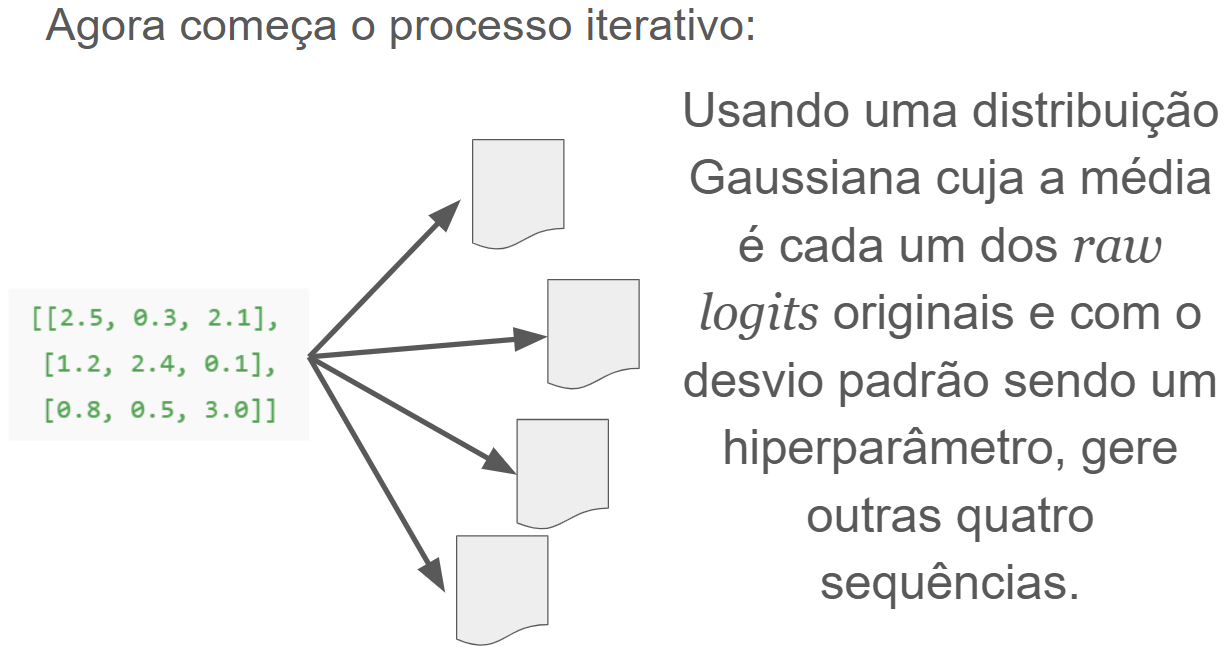

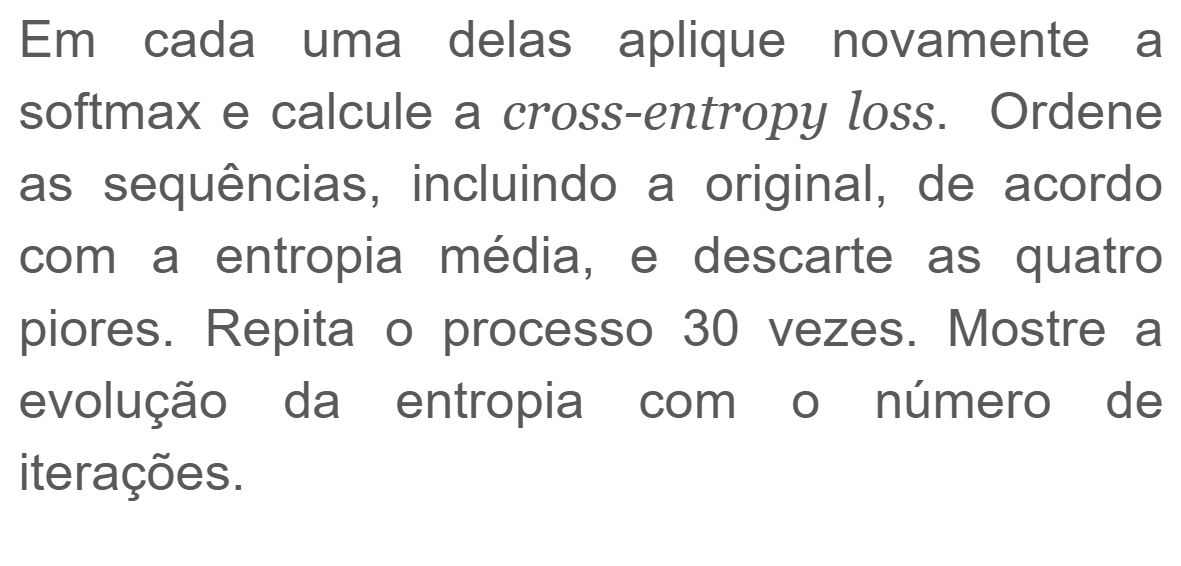

## Função Softmax

A função softmax é uma função matemática que transforma um vetor de valores reais (por exemplo, as saídas de um modelo) em probabilidades. Ela garante que:

* Todos os valores de saída estarão no intervalo
(
0
,
1
)

* A soma de todas as saídas será igual a 1 (como uma distribuição de probabilidade)

### Fórmula da função softmax

Dado um vetor de entrada

$$
\mathbf{z} = [z_1, z_2, \ldots, z_K],
$$

a função softmax retorna um vetor

$$
\sigma(\mathbf{z}) = [\sigma(z_1), \sigma(z_2), \ldots, \sigma(z_K)],
$$

onde:

$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad \text{para } i = 1, 2, \ldots, K
$$

---

### Significado

O numerador

$$
e^{z_i}
$$

garante que valores maiores terão maior peso.

O denominador

$$
\sum_{j=1}^{K} e^{z_j}
$$

normaliza os valores para que a soma seja 1.

A exponenciação faz com que a função seja mais sensível a diferenças nos valores de entrada, destacando o maior valor como mais provável.

---

### ✅ Usado: Softmax por linha (por amostra)

Para processar várias amostras ao mesmo tempo (batch), aplicamos a softmax **linha a linha** em uma matriz \( $$\mathbf{Z} \in \mathbb{R}^{N \times K}$$ \), onde:

- \( N \) é o número de amostras no lote (batch size)
- \( K \) é o número de classes

A versão vetorizada e estável da softmax para batches é:

```python
def softmax(logits):
    exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)


* Essa é a versão da softmax (batch-wise), aplicada linha a linha, ideal para processar várias amostras de uma só vez

## Resolução:

Semente usada: 1748764850

Últimos logits mantidos (os melhores encontrados):
[[ 8.28574124 -1.38493792 -1.02401471]
 [ 1.85974577 10.25482519 -3.63682146]
 [-2.21872011 -2.7146736   7.51386056]]

Evolução da Cross-Entropy Loss (30 iterações):
Iteração  1: 0.733397
Iteração  2: 0.567353
Iteração  3: 0.278405
Iteração  4: 0.200794
Iteração  5: 0.200794
Iteração  6: 0.200794
Iteração  7: 0.173157
Iteração  8: 0.109299
Iteração  9: 0.109299
Iteração 10: 0.068312
Iteração 11: 0.068312
Iteração 12: 0.061659
Iteração 13: 0.055362
Iteração 14: 0.041653
Iteração 15: 0.033282
Iteração 16: 0.022176
Iteração 17: 0.016951
Iteração 18: 0.012029
Iteração 19: 0.012029
Iteração 20: 0.006237
Iteração 21: 0.005669
Iteração 22: 0.005669
Iteração 23: 0.003443
Iteração 24: 0.001482
Iteração 25: 0.001035
Iteração 26: 0.000826
Iteração 27: 0.000514
Iteração 28: 0.000339
Iteração 29: 0.000279
Iteração 30: 0.000159


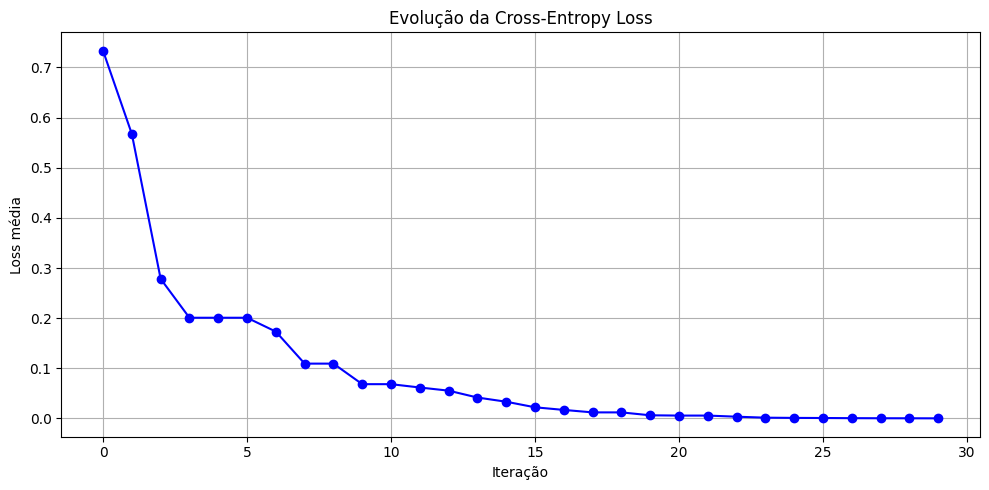

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def softmax(logits):
    exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(probs, true_labels):
    eps = 1e-15
    probs = np.clip(probs, eps, 1 - eps)
    losses = -np.sum(true_labels * np.log(probs), axis=1)
    return np.mean(losses)

# Hiperparâmetro: desvio padrão da distribuição Gaussiana
std_dev = 0.5

# Rótulos verdadeiros
true_labels = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Inicialização
seed = int(time.time())
np.random.seed(seed)

# Logits iniciais
logits_atuais = np.random.uniform(low=0.1, high=3.0, size=(3, 3))

# Histórico de perdas
loss_historico = []

# Loop de iteração
for iteration in range(30):
    logits_candidatos = [logits_atuais]  # incluir os logits atuais
    losses = []

    # Gerar 4 variações com ruído gaussiano
    for _ in range(4):
        noisy_logits = np.random.normal(loc=logits_atuais, scale=std_dev)
        logits_candidatos.append(noisy_logits)

    # Calcular perdas
    for logits in logits_candidatos:
        probs = softmax(logits)
        loss = cross_entropy_loss(probs, true_labels)
        losses.append(loss)

    # Ordenar candidatos pelo valor da perda
    sorted_indices = np.argsort(losses)
    best_index = sorted_indices[0]
    best_logits = logits_candidatos[best_index]
    best_loss = losses[best_index]

    # Atualizar os logits atuais
    logits_atuais = best_logits
    loss_historico.append(best_loss)

# Mostrar resultados
print("Semente usada:", seed)
print("\nÚltimos logits mantidos (os melhores encontrados):")
print(logits_atuais)

print("\nEvolução da Cross-Entropy Loss (30 iterações):")
for i, l in enumerate(loss_historico):
    print(f"Iteração {i+1:2d}: {l:.6f}")

# Plotando a evolução da perda
plt.figure(figsize=(10, 5))
plt.plot(loss_historico, marker='o', linestyle='-', color='blue')
plt.title("Evolução da Cross-Entropy Loss")
plt.xlabel("Iteração")
plt.ylabel("Loss média")
plt.grid(True)
plt.tight_layout()
plt.show()


* O desvio padrão std_dev controla o quanto as variações dos logits são diferentes da base. Quanto maior, mais "exploratória" é a busca.
* A perda geralmente diminui rapidamente no começo, porque há muito espaço para melhorar.
* Depois, estabiliza, à medida que as variações ficam pequenas e o modelo se aproxima de uma região "boa".
* Processo semelhante ao que acontece ao se aplicar alguns algoritmos da computação evolutiva.

# C - Naive Bayes and Spam

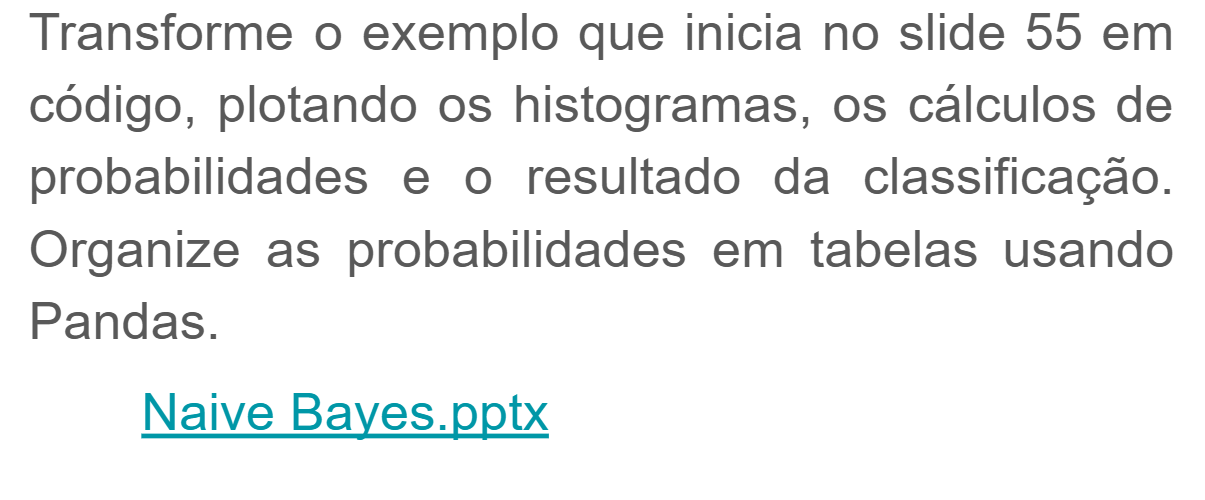

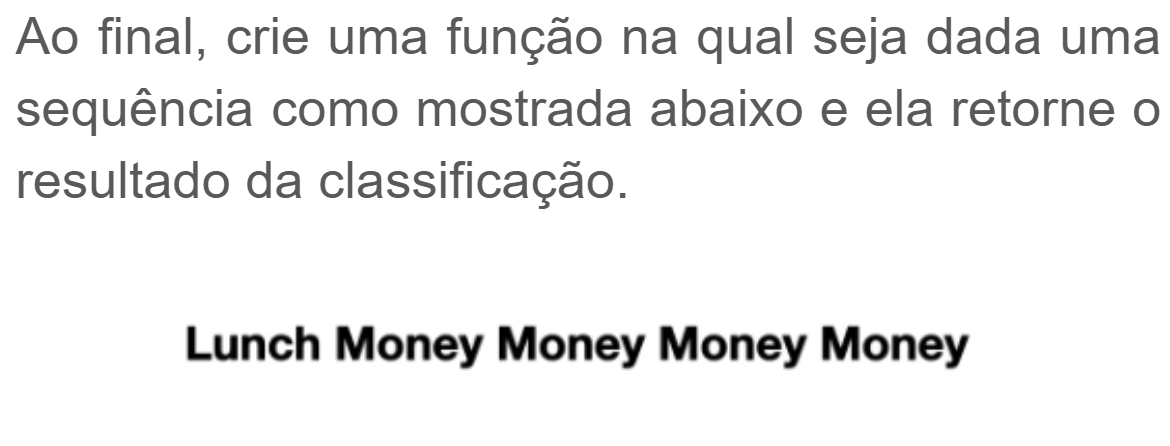

Email recebido: dear friend
Classe do email: Normal

Probabilidades e Contagens para emails Normais:
  Palavra  Contagem Normal  Probabilidade Normal
0    dear                9              0.428571
1  friend                6              0.285714
2   lunch                4              0.190476
3   money                2              0.095238

Probabilidades e Contagens para emails Spam:
  Palavra  Contagem Spam  Probabilidade Spam
0    dear              3            0.272727
1  friend              2            0.181818
2   lunch              1            0.090909
3   money              5            0.454545


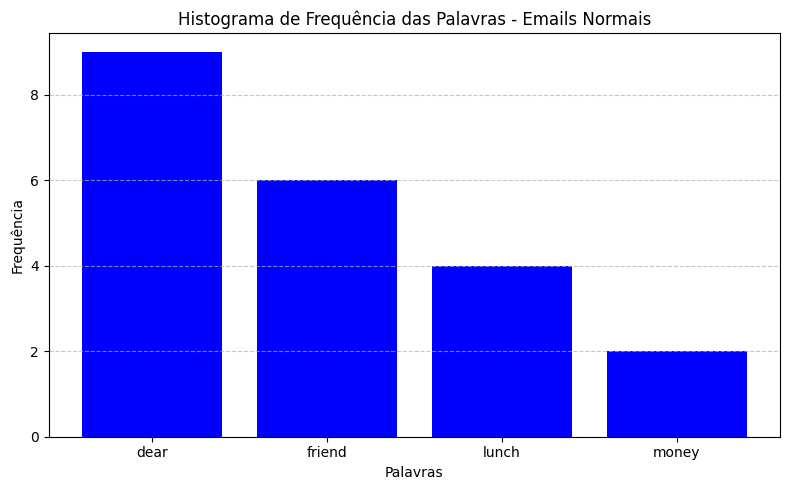

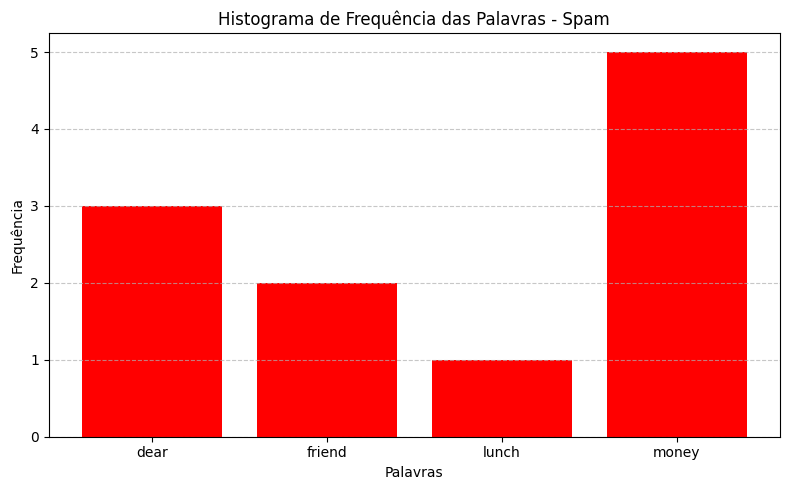

Email recebido: lunch money money money money
Classe do email: Spam



In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

def plot_histograma(lista, cor, tipo):
    contagem = Counter(lista)

    palavras = list(contagem.keys())
    frequencias = list(contagem.values())

    plt.figure(figsize=(8, 5))
    plt.bar(palavras, frequencias, color=cor)
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.title(f'Histograma de Frequência das Palavras - {tipo}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def classificador(spam, normal, email_recebido):
    palavras_chave = ['dear', 'friend', 'lunch', 'money']

    # Contagem das palavras nas listas normal e spam
    contagem_normal = [normal.count(palavra) for palavra in palavras_chave]
    contagem_spam = [spam.count(palavra) for palavra in palavras_chave]

    # Probabilidades das palavras nas duas classes
    prob_normal = [c / len(normal) for c in contagem_normal]
    prob_spam = [c / len(spam) for c in contagem_spam]

    # Criando DataFrames para as probabilidades
    df_normal = pd.DataFrame({
        'Palavra': palavras_chave,
        'Contagem Normal': contagem_normal,
        'Probabilidade Normal': prob_normal
    })

    df_spam = pd.DataFrame({
        'Palavra': palavras_chave,
        'Contagem Spam': contagem_spam,
        'Probabilidade Spam': prob_spam
    })

    qtd_email_normal = 8
    qtd_email_spam = 4

    prob_email_normal = qtd_email_normal / (qtd_email_normal + qtd_email_spam)
    prob_email_spam = qtd_email_spam / (qtd_email_normal + qtd_email_spam)

    email_recebido_lista = email_recebido.split()

    prob_normal_email = prob_email_normal
    prob_spam_email = prob_email_spam

    for palavra in email_recebido_lista:
        if palavra in palavras_chave:
            idx = palavras_chave.index(palavra)
            prob_normal_email *= prob_normal[idx]
            prob_spam_email *= prob_spam[idx]

    classe = 'Normal' if prob_normal_email > prob_spam_email else 'Spam'

    return classe, df_normal, df_spam

normal = ['dear', 'dear', 'dear', 'dear', 'dear', 'dear', 'dear', 'dear', 'dear', 'friend', 'friend', 'friend', 'friend', 'friend', 'friend', 'lunch', 'lunch', 'lunch', 'lunch', 'money', 'money']
spam = ['dear', 'dear', 'dear', 'friend', 'friend', 'lunch', 'money', 'money', 'money', 'money', 'money']
email_recebido = 'dear friend'

classe, df_normal, df_spam = classificador(spam, normal, email_recebido)

print(f'Email recebido: {email_recebido}')
print(f"Classe do email: {classe}\n")
print("Probabilidades e Contagens para emails Normais:")
print(df_normal)
print("\nProbabilidades e Contagens para emails Spam:")
print(df_spam)

plot_histograma(normal, 'blue', 'Emails Normais')
plot_histograma(spam, 'red', 'Spam')

email_recebido2 = 'lunch money money money money'

classe2, df_normal2, df_spam2 = classificador(spam, normal, email_recebido2)
print(f'Email recebido: {email_recebido2}')
print(f"Classe do email: {classe2}\n")


# D - Gauss Naive Bayes

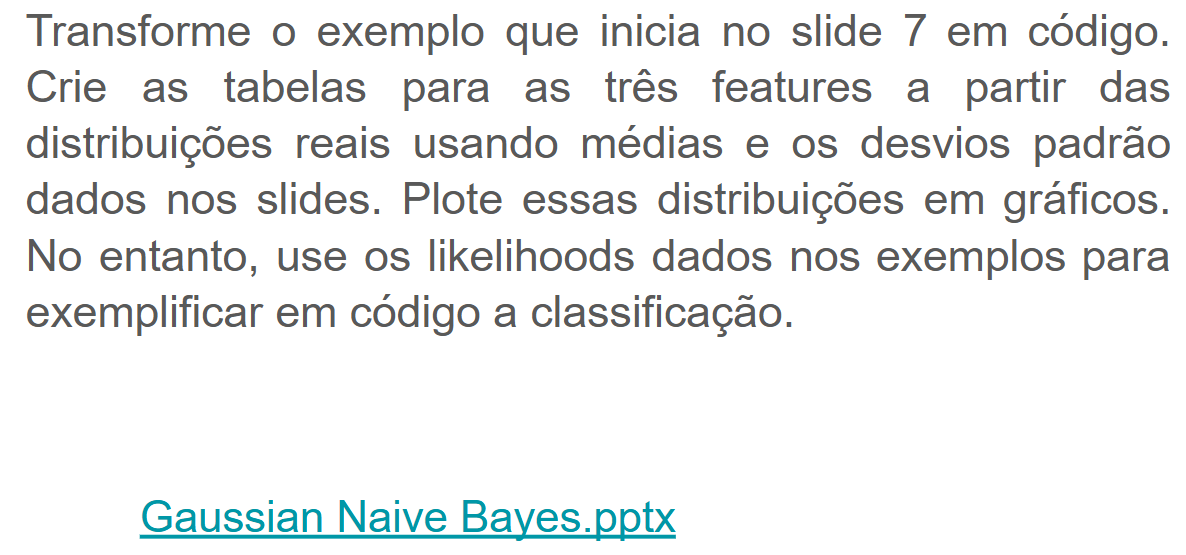

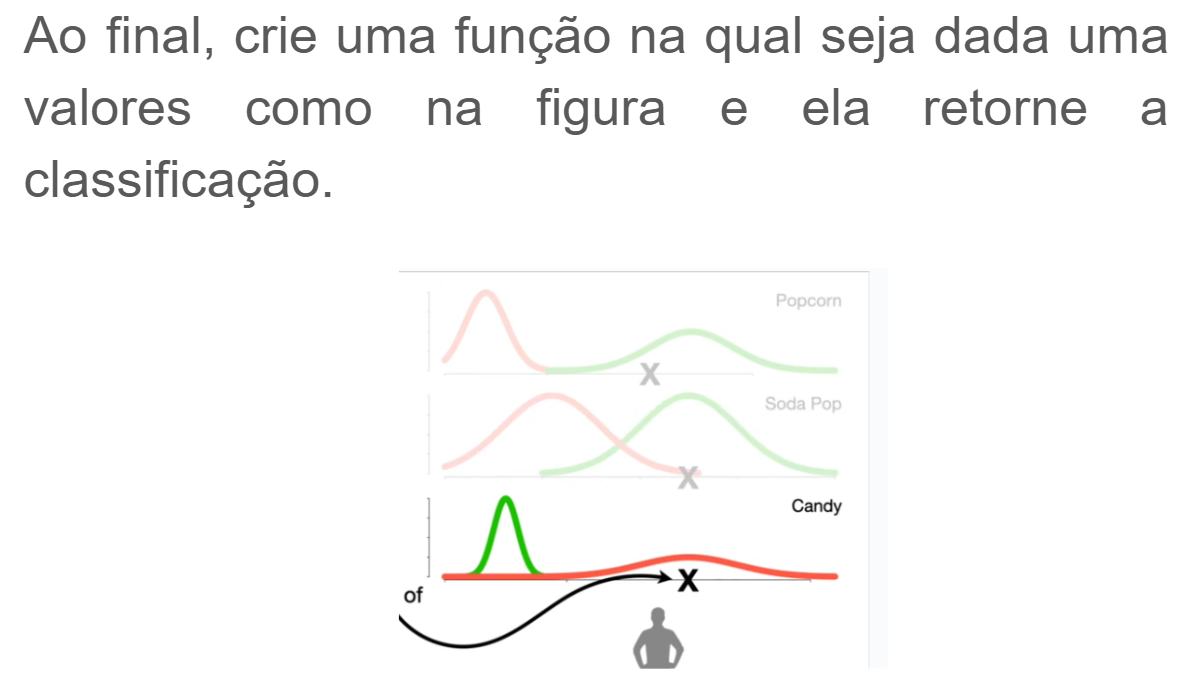

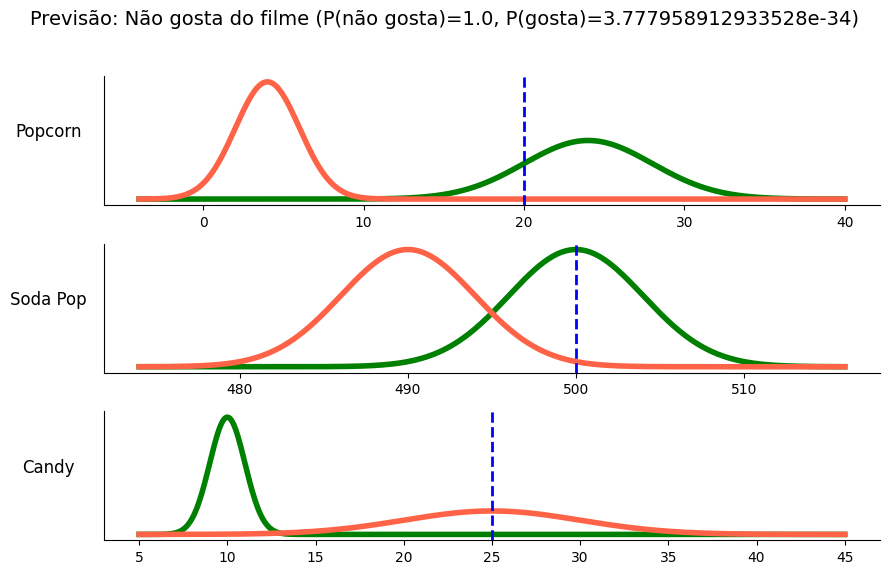



[25, 510, 15]
Gosta do filme


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, 800, 800)

params = {
    'Popcorn': {
        'green': (24, 4),   # gosta
        'red': (4, 2)       # não gosta
    },
    'Soda Pop': {
        'green': (500, 4),
        'red': (490, 4)
    },
    'Candy': {
        'green': (10, 1),
        'red': (25, 5)
    }
}

priors = {0: 8/16, 1: 8/16}

# Função de predição usando Gaussian Naive Bayes
def gassian_nb(sample):
    log_probs = {}
    for cls in [0, 1]:
        log_prob = np.log(priors[cls])
        for feature, value in zip(['Popcorn', 'Soda Pop', 'Candy'], sample):
            color = 'green' if cls == 1 else 'red'
            mu, std = params[feature][color]
            log_prob += norm.logpdf(value, mu, std)
        log_probs[cls] = log_prob
    max_log = max(log_probs.values())
    probs_exp = {cls: np.exp(log_probs[cls] - max_log) for cls in log_probs}
    total = sum(probs_exp.values())
    probs = {k: v / total for k, v in probs_exp.items()}
    prediction = max(probs, key=probs.get)
    return prediction, probs

# Amostra da nova pessoa
sample = [20, 500, 25]
features = ['Popcorn', 'Soda Pop', 'Candy']
pred, probs = gassian_nb(sample)

# Plotagem dos gráficos
fig, axes = plt.subplots(3, 1, figsize=(9, 6), sharex=False)

for i, ax in enumerate(axes):
    feature = features[i]
    mu_g, std_g = params[feature]['green']
    mu_r, std_r = params[feature]['red']

    x_range = np.linspace(
        min(mu_g - 4*std_g, mu_r - 4*std_r),
        max(mu_g + 4*std_g, mu_r + 4*std_r),
        500
    )

    # Plotar distribuições
    y_g = norm.pdf(x_range, mu_g, std_g)
    y_r = norm.pdf(x_range, mu_r, std_r)
    ax.plot(x_range, y_g, color='green', linewidth=4)
    ax.plot(x_range, y_r, color='tomato', linewidth=4)

    # Ponto da nova amostra
    ax.axvline(sample[i], color='blue', linestyle='--', linewidth=2)

    ax.set_yticks([])
    ax.set_ylabel(feature, rotation=0, labelpad=40, fontsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Resultado final
final_pred = "Gosta do filme" if pred == 1 else "Não gosta do filme"
fig.suptitle(
    f"Previsão: {final_pred} (P(não gosta)={probs[0]}, P(gosta)={probs[1]})",
    fontsize=14
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


sample = [25, 510, 15]
features = ['Popcorn', 'Soda Pop', 'Candy']
pred, probs = gassian_nb(sample)
final_pred = "Gosta do filme" if pred == 1 else "Não gosta do filme"
print()
print()
print(sample)
print(final_pred)

# E - Naive Bayes and Iris dataset/Acurácia

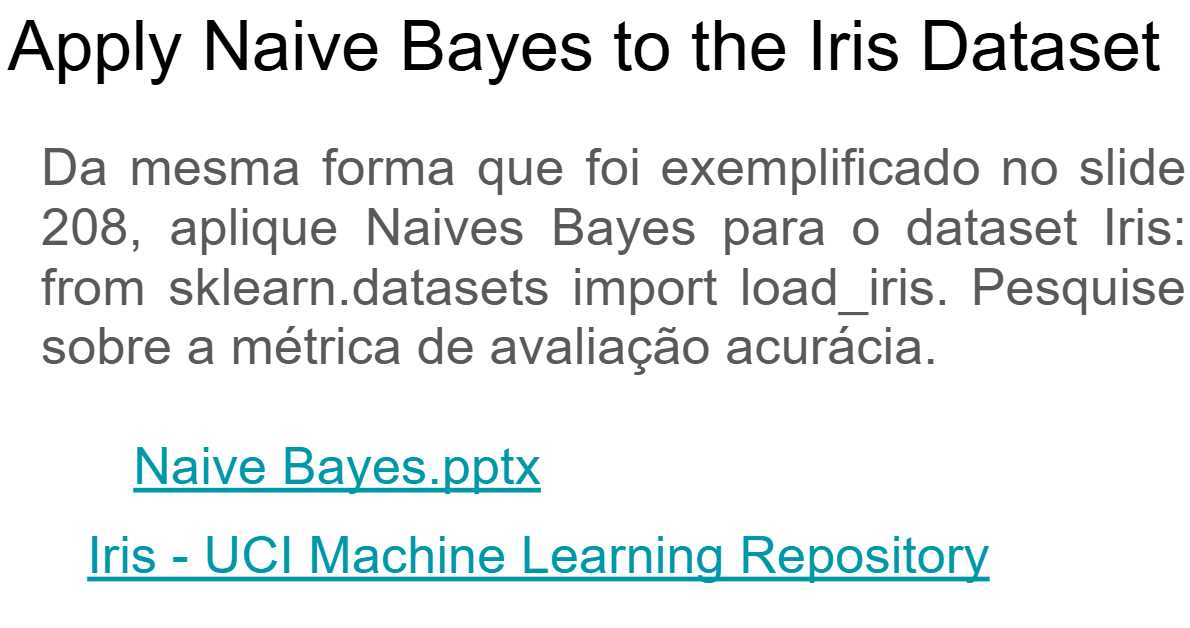

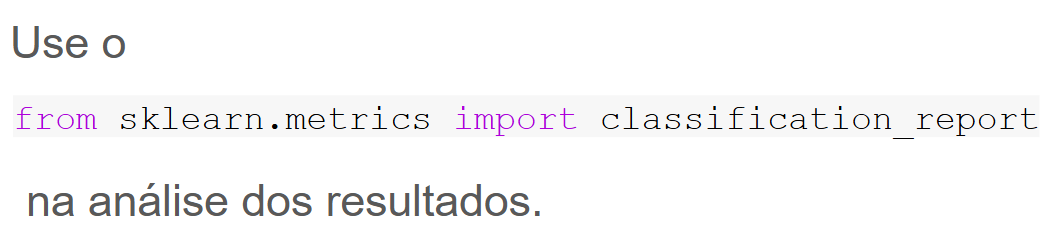

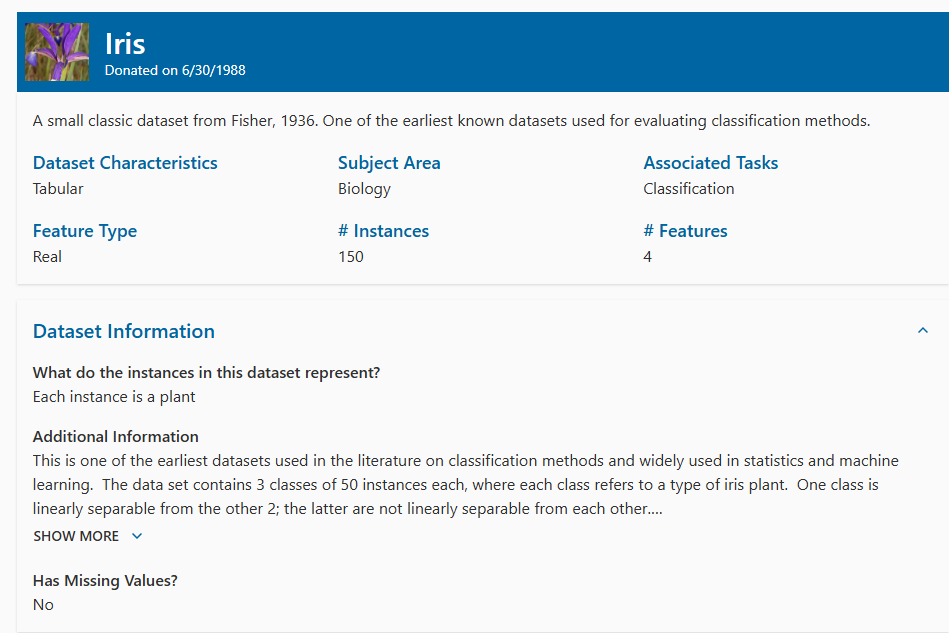

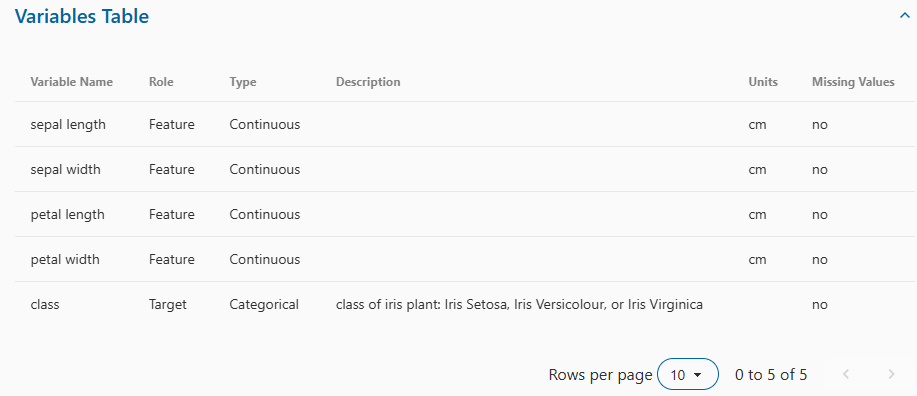

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o classificador Naive Bayes Gaussiano
model = GaussianNB()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



* A acuracia indica a proporção de previsões corretas em relação ao total de previsões feitas.

$$\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}$$

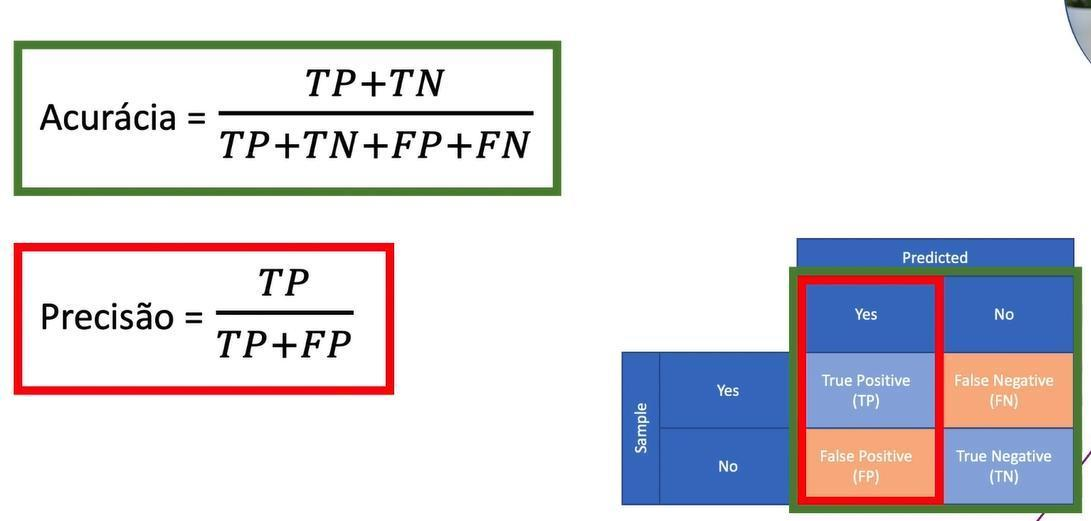

* É boa quando as classes estão balanceadas, ou seja, quando há mais ou menos a mesma quantidade de exemplos para cada classe.

# F - Simule os slides

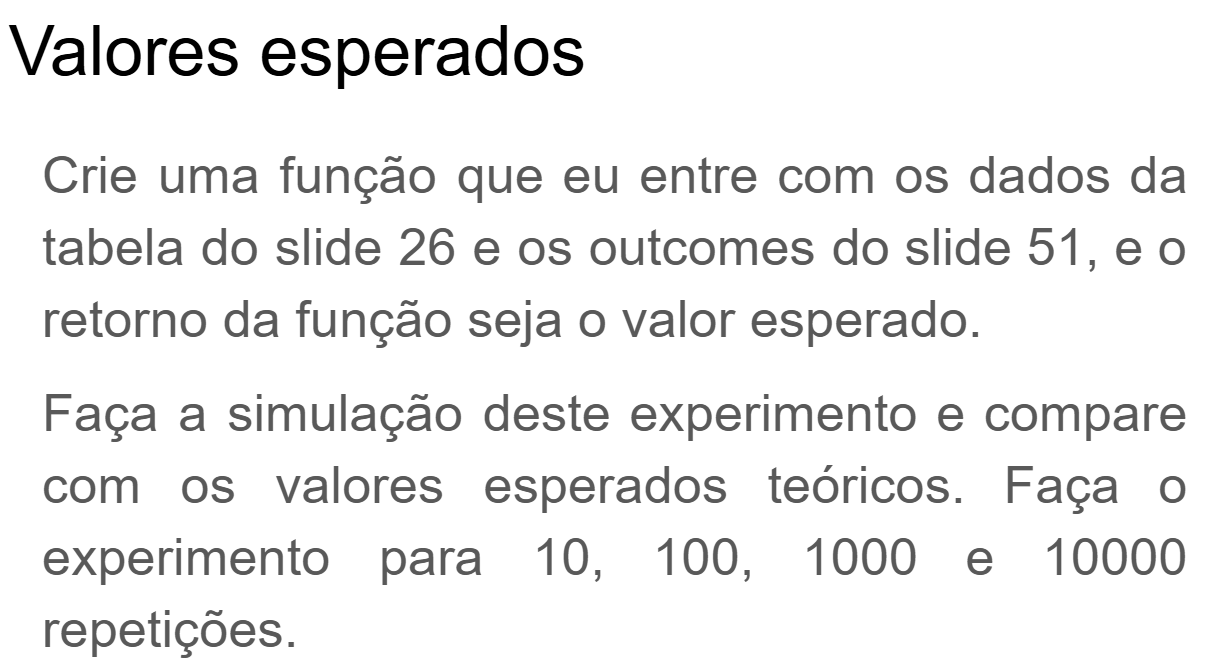

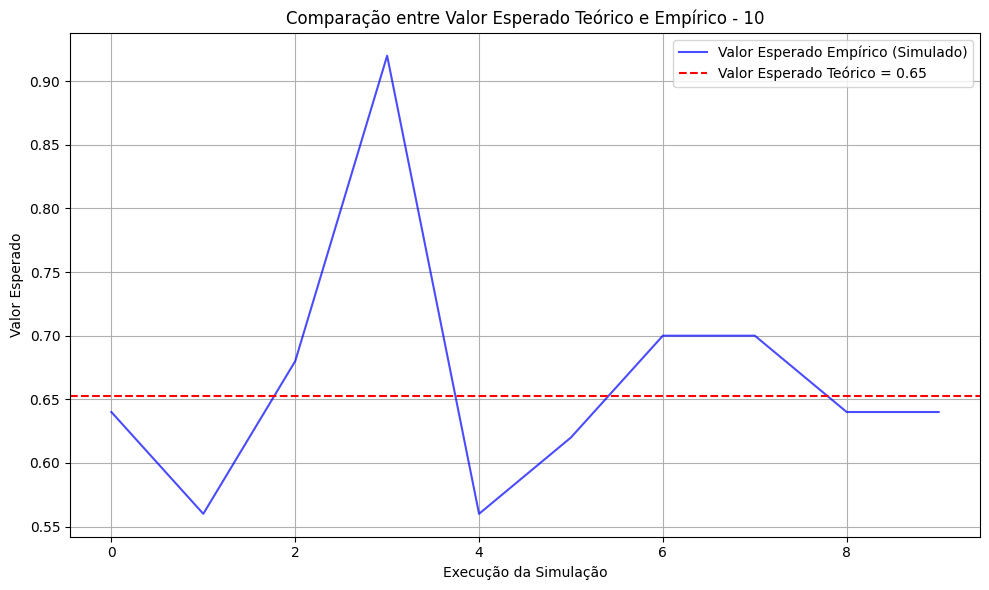

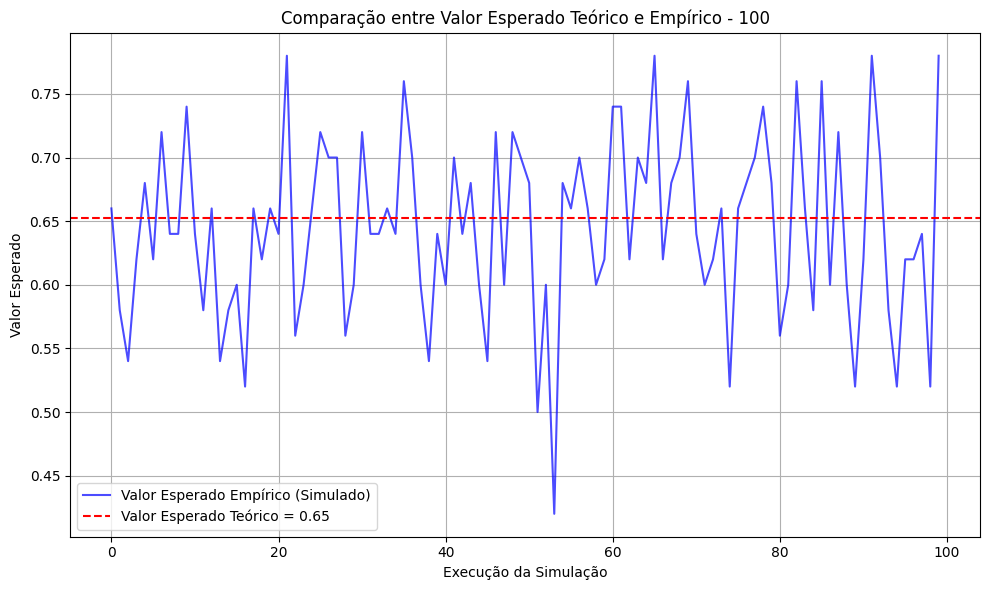

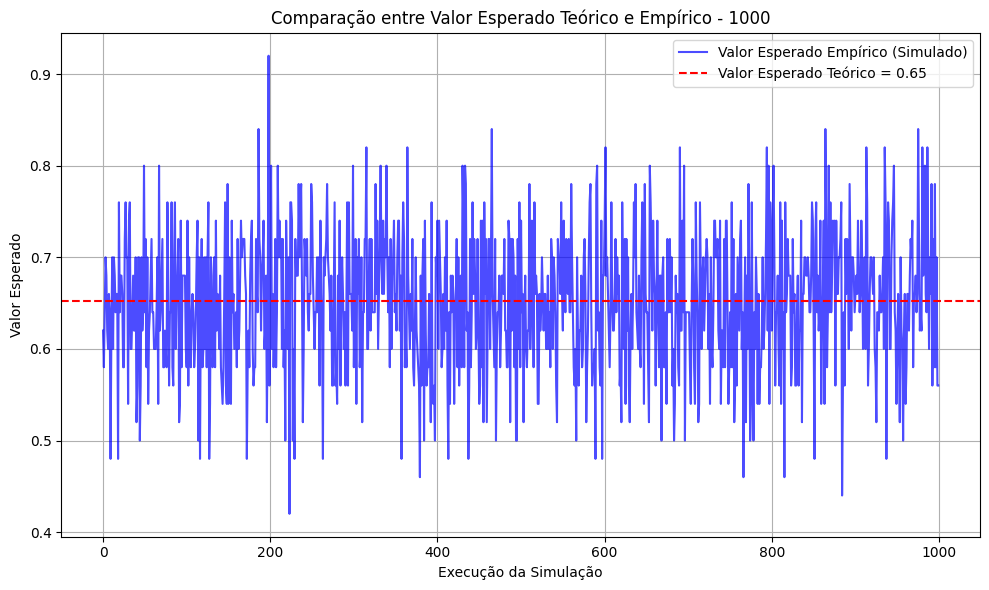

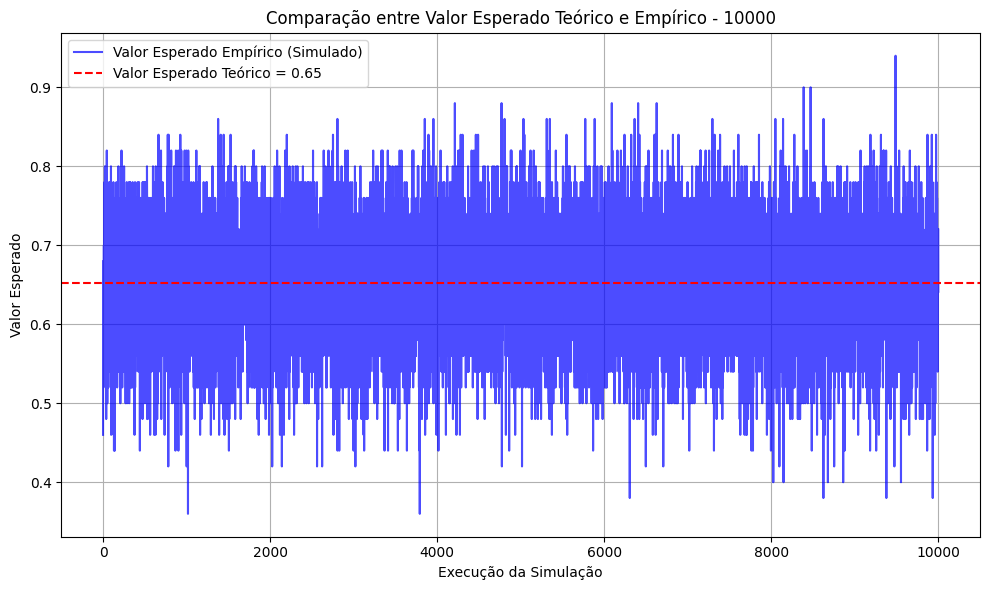

In [ ]:
import random
import matplotlib.pyplot as plt

# Suas funções:
def valor_esperado_teorico(n_assistiram, n_nao_assistiram, outcome_assistiram, outcome_nao_assistiram):
    total = n_assistiram + n_nao_assistiram
    if total == 0:
        raise ValueError("A população total não pode ser zero.")

    p_assistiram = n_assistiram / total
    p_nao_assistiram = n_nao_assistiram / total

    esperado = p_assistiram * outcome_assistiram + p_nao_assistiram * outcome_nao_assistiram
    return esperado

def valor_esperado_simulado(n_assistiram, n_nao_assistiram, outcome_assistiram, outcome_nao_assistiram, n_repeticoes):
    populacao = [outcome_assistiram] * n_assistiram + [outcome_nao_assistiram] * n_nao_assistiram

    if len(populacao) == 0:
        raise ValueError("A população não pode ser vazia.")

    resultados = random.choices(populacao, k=n_repeticoes)
    valor_esperado_empirico = sum(resultados) / n_repeticoes
    return valor_esperado_empirico

n_assistiram = 37
n_nao_assistiram = 176
outcome_assistiram = -1
outcome_nao_assistiram = 1
n_repeticoes = 100  # escolhidos por simulação
n_execucoes = [10, 100, 1000, 10000]   # número de execuções do experimento

# Calcular valor esperado teórico
teorico = valor_esperado_teorico(n_assistiram, n_nao_assistiram, outcome_assistiram, outcome_nao_assistiram)

# Simulações
for n in n_execucoes:
  empiricos = [valor_esperado_simulado(n_assistiram, n_nao_assistiram, outcome_assistiram, outcome_nao_assistiram, n_repeticoes) for _ in range(n)]

  # Plot do gráfico
  plt.figure(figsize=(10, 6))
  plt.plot(empiricos, label='Valor Esperado Empírico (Simulado)', color='blue', alpha=0.7)
  plt.axhline(teorico, color='red', linestyle='--', label=f'Valor Esperado Teórico = {teorico:.2f}')
  plt.title(f'Comparação entre Valor Esperado Teórico e Empírico - {n}')
  plt.xlabel('Execução da Simulação')
  plt.ylabel('Valor Esperado')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()